<a href="https://colab.research.google.com/github/feist000/Project/blob/master/OTT%20%ED%94%8C%EB%9E%AB%ED%8F%BC%20%EC%B6%94%EC%B2%9C%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/rwatcha_%EC%8B%9C%EC%A6%8C_%EC%A0%84%EC%B2%B4_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from konlpy.tag import Kkma
m=Kkma()

In [ ]:
df=pd.read_csv('C:/Users/user/Desktop/project/watcha_all.csv')

In [ ]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,title,nickname,datetime,content
0,0,1,왓챠플레이 크리미널 마인드 오역 모음 (시즌4-6),연재\n(whyjaylee),2019. 1. 28. 14:08,요즘 왓챠 플레이로 추억의 크리미널 마인드를 다시보고있는데 시즌3부터 다시 보니 앳...
1,1,2,"왓챠, 영화 1100편 돌파! 마시우의 취향을 알아보자",마시우,2019. 2. 19. 22:21,"안녕하세요, 마시우입니다. 취미 삼아 무비 라이프를 즐기고 블로그를 한지도 꽤 오래..."
2,2,3,"넷플릭스 해지 간단하다, 한달무료 이용 후 재가입했지만 내 스타일은 왓챠플레이 인걸로~",브레쑝\n(anboday),2019. 2. 13. 21:21,작년에 궁금해서 넷플릭스랑 왓챠플레이도 한달무료 이용해봤다. 얼마 전 요금제 알아...
3,3,5,넷플릭스 사용 후기:: 한 달 무료 체험으로 우선 쉽게 즐겨봐~! (feat. 왓챠...,졔졔,2019. 2. 1. 15:44,안녕하세요 :-)\n코타츠와 랩탑으로 요즘 '집순이의 길'로 걷고 있는 졔졔입니다....
4,4,7,왓챠의 콘텐츠 프로토콜 프로젝트!,힐데,2019. 2. 15. 18:01,왓챠께서 나에게 십마넌을 주셨다. 어느 날 왓챠 접속을 했는데 계정에 '내 ctp...


In [ ]:
df.shape

(4439, 6)

In [ ]:
content_new=[]
for i in range(len(df)):
    content_new.append(str(df["content"][i]))
content_new[:1]
df["content_new"]=content_new

# 일단 해야 하는 것
    #전처리
    #str.replace([정규표현식]) 영문 제외 나머지 지워야 해서 넣음 : 공백으로 대체해!
    #한글자 짜리인 것들 도 삭제
    #소문자로 변환
    #공백으로 토큰화, 문장 하나하나의 각각의 토큰이 리스트로 들어감
    #불용어 제거

In [ ]:
import re 
# '한글'을 제외한 다른 문자 모두 제거
remove_except_ko = re.compile(r"[^가-힣ㄱ-ㅎㅏ-ㅣ\\s|A-Za-z]")
def preprocess(text):
    text = re.sub(remove_except_ko,' ',text).strip()
    return text

df['clean_doc'] = df['content_new'].map(lambda x : preprocess(x))
df.head(5)

,Unnamed: 0,Unnamed: 0.1,title,nickname,datetime,content,content_new,clean_doc
0,0,1,왓챠플레이 크리미널 마인드 오역 모음 (시즌4-6),연재\n(whyjaylee),2019. 1. 28. 14:08,요즘 왓챠 플레이로 추억의 크리미널 마인드를 다시보고있는데 시즌3부터 다시 보니 앳...,요즘 왓챠 플레이로 추억의 크리미널 마인드를 다시보고있는데 시즌3부터 다시 보니 앳...,요즘 왓챠 플레이로 추억의 크리미널 마인드를 다시보고있는데 시즌 부터 다시 보니 앳...
1,1,2,"왓챠, 영화 1100편 돌파! 마시우의 취향을 알아보자",마시우,2019. 2. 19. 22:21,"안녕하세요, 마시우입니다. 취미 삼아 무비 라이프를 즐기고 블로그를 한지도 꽤 오래...","안녕하세요, 마시우입니다. 취미 삼아 무비 라이프를 즐기고 블로그를 한지도 꽤 오래...",안녕하세요 마시우입니다 취미 삼아 무비 라이프를 즐기고 블로그를 한지도 꽤 오래...
2,2,3,"넷플릭스 해지 간단하다, 한달무료 이용 후 재가입했지만 내 스타일은 왓챠플레이 인걸로~",브레쑝\n(anboday),2019. 2. 13. 21:21,작년에 궁금해서 넷플릭스랑 왓챠플레이도 한달무료 이용해봤다. 얼마 전 요금제 알아...,작년에 궁금해서 넷플릭스랑 왓챠플레이도 한달무료 이용해봤다. 얼마 전 요금제 알아...,작년에 궁금해서 넷플릭스랑 왓챠플레이도 한달무료 이용해봤다 얼마 전 요금제 알아보...
3,3,5,넷플릭스 사용 후기:: 한 달 무료 체험으로 우선 쉽게 즐겨봐~! (feat. 왓챠...,졔졔,2019. 2. 1. 15:44,안녕하세요 :-)\n코타츠와 랩탑으로 요즘 '집순이의 길'로 걷고 있는 졔졔입니다....,안녕하세요 :-)\n코타츠와 랩탑으로 요즘 '집순이의 길'로 걷고 있는 졔졔입니다....,안녕하세요 코타츠와 랩탑으로 요즘 집순이의 길 로 걷고 있는 졔졔입니다 ...
4,4,7,왓챠의 콘텐츠 프로토콜 프로젝트!,힐데,2019. 2. 15. 18:01,왓챠께서 나에게 십마넌을 주셨다. 어느 날 왓챠 접속을 했는데 계정에 '내 ctp...,왓챠께서 나에게 십마넌을 주셨다. 어느 날 왓챠 접속을 했는데 계정에 '내 ctp...,왓챠께서 나에게 십마넌을 주셨다 어느 날 왓챠 접속을 했는데 계정에 내 ctp...


In [ ]:
from konlpy.tag import Kkma
m=Kkma()

In [ ]:
stop_word = ['께서','에서','이다','에게','으로','이랑','까지','부터','하다','습니다','https','com']
stopPos = ['JKS','JKC','JKG','JKO','JKM','JKI','JKQ','JC','JX','EPH','EPT'
           ,'EPP','EFN','EFQ','EFO','EFA','EFI','EFR','ECE','ECS','ECD','ETN','ETD','XPN','XPV',
            'XSN','XSV','XSA','XR','SF','SE','SS','SP','SO','SW','OH','ON','UN','MAC',"NNB","NNM","VXV"]
def token_mecab(text):
    text = m.pos(text)
    text = [i for i in text if len(i[0])>1]
    text = [i for i in text if i[0] not in stop_word]
    text = [i[0] for i in text if i[1] not in stopPos]
    return text

In [ ]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,title,nickname,datetime,content,content_new,clean_doc
0,0,1,왓챠플레이 크리미널 마인드 오역 모음 (시즌4-6),연재\n(whyjaylee),2019. 1. 28. 14:08,요즘 왓챠 플레이로 추억의 크리미널 마인드를 다시보고있는데 시즌3부터 다시 보니 앳...,요즘 왓챠 플레이로 추억의 크리미널 마인드를 다시보고있는데 시즌3부터 다시 보니 앳...,요즘 왓챠 플레이로 추억의 크리미널 마인드를 다시보고있는데 시즌 부터 다시 보니 앳...
1,1,2,"왓챠, 영화 1100편 돌파! 마시우의 취향을 알아보자",마시우,2019. 2. 19. 22:21,"안녕하세요, 마시우입니다. 취미 삼아 무비 라이프를 즐기고 블로그를 한지도 꽤 오래...","안녕하세요, 마시우입니다. 취미 삼아 무비 라이프를 즐기고 블로그를 한지도 꽤 오래...",안녕하세요 마시우입니다 취미 삼아 무비 라이프를 즐기고 블로그를 한지도 꽤 오래...
2,2,3,"넷플릭스 해지 간단하다, 한달무료 이용 후 재가입했지만 내 스타일은 왓챠플레이 인걸로~",브레쑝\n(anboday),2019. 2. 13. 21:21,작년에 궁금해서 넷플릭스랑 왓챠플레이도 한달무료 이용해봤다. 얼마 전 요금제 알아...,작년에 궁금해서 넷플릭스랑 왓챠플레이도 한달무료 이용해봤다. 얼마 전 요금제 알아...,작년에 궁금해서 넷플릭스랑 왓챠플레이도 한달무료 이용해봤다 얼마 전 요금제 알아보...
3,3,5,넷플릭스 사용 후기:: 한 달 무료 체험으로 우선 쉽게 즐겨봐~! (feat. 왓챠...,졔졔,2019. 2. 1. 15:44,안녕하세요 :-)\n코타츠와 랩탑으로 요즘 '집순이의 길'로 걷고 있는 졔졔입니다....,안녕하세요 :-)\n코타츠와 랩탑으로 요즘 '집순이의 길'로 걷고 있는 졔졔입니다....,안녕하세요 코타츠와 랩탑으로 요즘 집순이의 길 로 걷고 있는 졔졔입니다 ...
4,4,7,왓챠의 콘텐츠 프로토콜 프로젝트!,힐데,2019. 2. 15. 18:01,왓챠께서 나에게 십마넌을 주셨다. 어느 날 왓챠 접속을 했는데 계정에 '내 ctp...,왓챠께서 나에게 십마넌을 주셨다. 어느 날 왓챠 접속을 했는데 계정에 '내 ctp...,왓챠께서 나에게 십마넌을 주셨다 어느 날 왓챠 접속을 했는데 계정에 내 ctp...


In [ ]:
# 토큰화 + 토큰리스트 생성 
def make_tokens(df):
    df['tokens'] = ''
    tokens_list=[]
    for i, row in df.iterrows():
        if i%10000==0:
            print(i,'/',len(df))
        token = token_mecab(df['clean_doc'][i])
        df['tokens'][i] = ' '.join(token)
    return df

In [ ]:
df = make_tokens(df)

0 / 4439


<ipython-input-11-ef06fb958fac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'][i] = ' '.join(token)


In [ ]:
df.head(3)

,Unnamed: 0,Unnamed: 0.1,title,nickname,datetime,content,content_new,clean_doc,tokens
0,0,1,왓챠플레이 크리미널 마인드 오역 모음 (시즌4-6),연재\n(whyjaylee),2019. 1. 28. 14:08,요즘 왓챠 플레이로 추억의 크리미널 마인드를 다시보고있는데 시즌3부터 다시 보니 앳...,요즘 왓챠 플레이로 추억의 크리미널 마인드를 다시보고있는데 시즌3부터 다시 보니 앳...,요즘 왓챠 플레이로 추억의 크리미널 마인드를 다시보고있는데 시즌 부터 다시 보니 앳...,요즘 플레이 추억 크리 마인드 다시 시즌 다시 앳되 리드 JJ 반갑 지금 하차 멤버...
1,1,2,"왓챠, 영화 1100편 돌파! 마시우의 취향을 알아보자",마시우,2019. 2. 19. 22:21,"안녕하세요, 마시우입니다. 취미 삼아 무비 라이프를 즐기고 블로그를 한지도 꽤 오래...","안녕하세요, 마시우입니다. 취미 삼아 무비 라이프를 즐기고 블로그를 한지도 꽤 오래...",안녕하세요 마시우입니다 취미 삼아 무비 라이프를 즐기고 블로그를 한지도 꽤 오래...,안녕 하세 시우 취미 삼아 무비 라이프 즐기 로그 한지 오래되 그동안 영화 명작 만...
2,2,3,"넷플릭스 해지 간단하다, 한달무료 이용 후 재가입했지만 내 스타일은 왓챠플레이 인걸로~",브레쑝\n(anboday),2019. 2. 13. 21:21,작년에 궁금해서 넷플릭스랑 왓챠플레이도 한달무료 이용해봤다. 얼마 전 요금제 알아...,작년에 궁금해서 넷플릭스랑 왓챠플레이도 한달무료 이용해봤다. 얼마 전 요금제 알아...,작년에 궁금해서 넷플릭스랑 왓챠플레이도 한달무료 이용해봤다 얼마 전 요금제 알아보...,작년 궁금하 플레이 무료 이용 얼마 요금 알아보 다시 이용 해본 후기 가입 미리 해...


In [ ]:
tokenized_doc=df["tokens"].apply(lambda x: x.split());tokenized_doc
tokenized_docs=tokenized_doc.apply(lambda x : ' '.join ([item for item in x if item not in stop_word]))

In [ ]:
type(tokenized_docs)

pandas.core.series.Series

In [ ]:
def my_tokenizer(text):
    return text.split()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tfidf_vect=TfidfVectorizer(tokenizer=my_tokenizer)
tfidf=tfidf_vect.fit_transform(tokenized_docs)
# 모델선언
lda=LatentDirichletAllocation(n_components=10)
lda_output=lda.fit_transform(tfidf)

In [ ]:
! pip install pyLDAvis

  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97716 sha256=fc5294dbb16808d44178e37405a157a5502edfd416d2c22571a342f5b9664898
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\31\8c\a0\24a443892f2134e691d59c8c6c35e19821e02f85e49871f8fd
Successfully built pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis=pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vect,mds='tsne')
pyLDAvis.display(vis)

In [ ]:
from wordcloud import WordCloud

In [ ]:
df["tokens"]

0       요즘 플레이 추억 크리 마인드 다시 시즌 다시 앳되 리드 JJ 반갑 지금 하차 멤버...
1       안녕 하세 시우 취미 삼아 무비 라이프 즐기 로그 한지 오래되 그동안 영화 명작 만...
2       작년 궁금하 플레이 무료 이용 얼마 요금 알아보 다시 이용 해본 후기 가입 미리 해...
3       안녕 요즘 이의 이젠 급기야 가입 진짜 경보 울리 일보 직전 ㅎㅎ 드라마 영화 즐기...
4       어느 접속 계정 ctp 확인 하기 버튼 생기 누르 이런 화면 알아보 이용 내가 제공...
                              ...                        
4434    영화 영화 추천 혼자 영화 선뜻 영화 워낙에 영화 보기 스트레스 해소 방법 생각 즐...
4435    안녕 여러분 중국 드라마 어디 미국 드라마 채널 자막 구하 중국 드라마 자막 영상 ...
4436    시작 점점 질리 내가 드라마 시즌 기다리 중이 어떤 취소 드라마 언니 시즌 언니 만...
4437    최근 재미있 와이 우먼 추천 해보 우선 저의 취향 먼저 말하 억지 감동 억지 눈물 ...
4438    안녕 저번 와이 우먼 빠지 유명 작품 주행 끝내 이브 그렇 ㅠㅠ 지금 시즌 공개 하...
Name: tokens, Length: 4439, dtype: object

In [ ]:
for i in range(len(df)):
    b=str(df['tokens'])

In [ ]:
b

'0       요즘 플레이 추억 크리 마인드 다시 시즌 다시 앳되 리드 JJ 반갑 지금 하차 멤버...\n1       안녕 하세 시우 취미 삼아 무비 라이프 즐기 로그 한지 오래되 그동안 영화 명작 만...\n2       작년 궁금하 플레이 무료 이용 얼마 요금 알아보 다시 이용 해본 후기 가입 미리 해...\n3       안녕 요즘 이의 이젠 급기야 가입 진짜 경보 울리 일보 직전 ㅎㅎ 드라마 영화 즐기...\n4       어느 접속 계정 ctp 확인 하기 버튼 생기 누르 이런 화면 알아보 이용 내가 제공...\n                              ...                        \n4434    영화 영화 추천 혼자 영화 선뜻 영화 워낙에 영화 보기 스트레스 해소 방법 생각 즐...\n4435    안녕 여러분 중국 드라마 어디 미국 드라마 채널 자막 구하 중국 드라마 자막 영상 ...\n4436    시작 점점 질리 내가 드라마 시즌 기다리 중이 어떤 취소 드라마 언니 시즌 언니 만...\n4437    최근 재미있 와이 우먼 추천 해보 우선 저의 취향 먼저 말하 억지 감동 억지 눈물 ...\n4438    안녕 저번 와이 우먼 빠지 유명 작품 주행 끝내 이브 그렇 ㅠㅠ 지금 시즌 공개 하...\nName: tokens, Length: 4439, dtype: object'

In [ ]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',max_font_size=100,background_color='white').generate(b)

In [ ]:
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

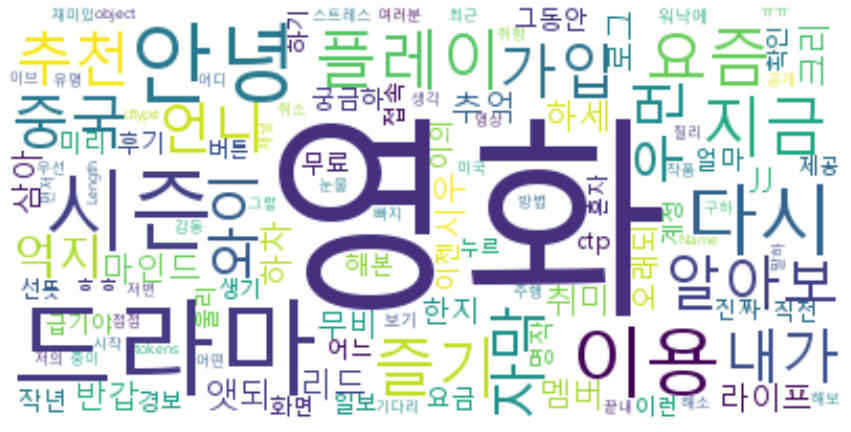

In [ ]:
fig = plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')